<a href="https://colab.research.google.com/github/MestDash/PID/blob/main/notebooks/data_analysis_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Population statistics

In [3]:
!pip install pandas matplotlib seaborn biopython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("ds_FLOWSOM.csv")

In [14]:
sns.set(style="whitegrid", context="talk", palette="deep")

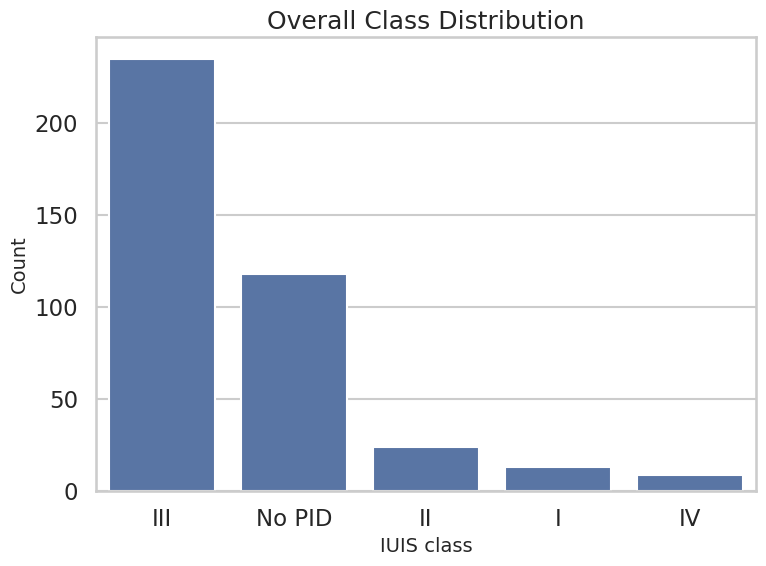

In [66]:
# Define a mapping from original class names to shorter labels
class_labels = {
    "I: Immunodefciencies afecting cellular and humoral immunity": "I",
    "II: Combined immunodefciencies with associated or syndromic features": "II",
    "III: Predominantly antibody defciencies": "III",
    "IV: Diseases of immune dysregulation": "IV",
    "No arguments for lymphoid-PID": "No PID"
}

# Plot using renamed labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="IUIS", order=df["IUIS"].value_counts().index)

# Replace tick labels on x-axis
current_labels = df["IUIS"].value_counts().index
plt.xticks(
    ticks=range(len(current_labels)),
    labels=[class_labels.get(label, label) for label in current_labels],
    #rotation=45
)

plt.title("Overall Class Distribution", fontsize=18)
plt.xlabel("IUIS class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.savefig("overall_class_distribution.png", dpi=300)
plt.show()

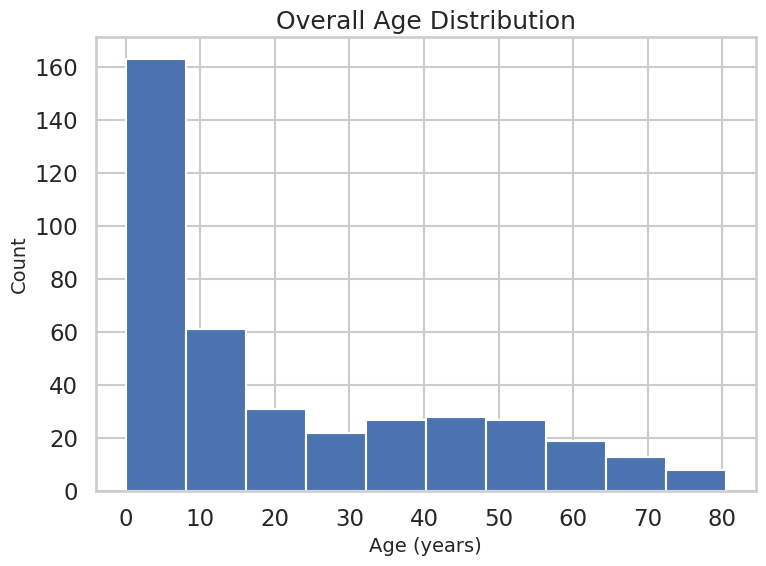

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Age (Y)"], bins=10, alpha=1.0)
plt.title("Overall Age Distribution", fontsize=18)
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.savefig("overall_age_distribution.png", dpi=300)
plt.show()

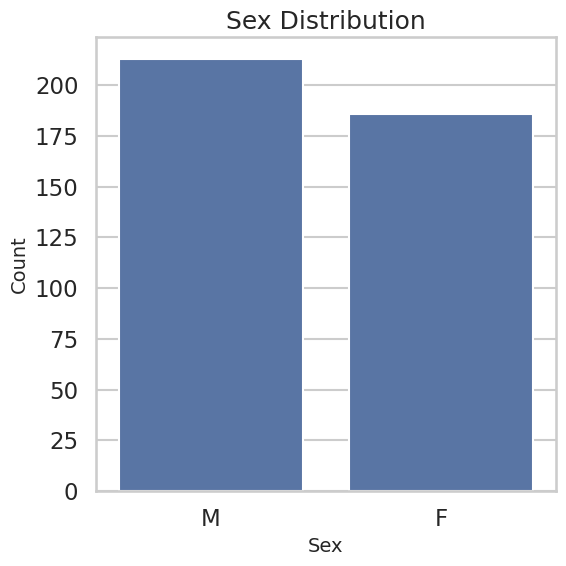

In [68]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="M:F", order=df["M:F"].value_counts().index)
plt.title("Sex Distribution", fontsize=18)
plt.xlabel("Sex", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.savefig("sex_distribution.png", dpi=300)
plt.show()

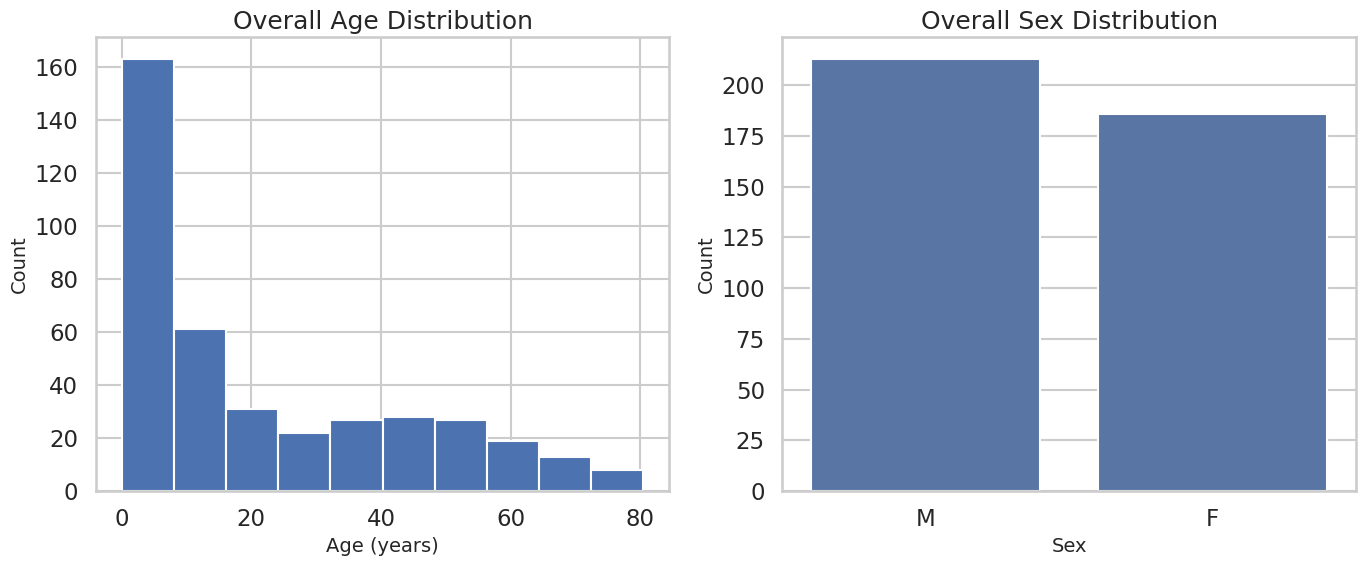

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Age Distribution
sns.histplot(df["Age (Y)"], bins=10, ax=axes[0], alpha=1.0)
axes[0].set_title("Overall Age Distribution", fontsize=18)
axes[0].set_xlabel("Age (years)", fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)

# Plot 2: Sex Distribution
sns.countplot(data=df, x="M:F", order=df["M:F"].value_counts().index, ax=axes[1])
axes[1].set_title("Overall Sex Distribution", fontsize=18)
axes[1].set_xlabel("Sex", fontsize=14)
axes[1].set_ylabel("Count", fontsize=14)

plt.tight_layout()
plt.savefig("age_and_sex_distribution.png", dpi=300)
plt.show()


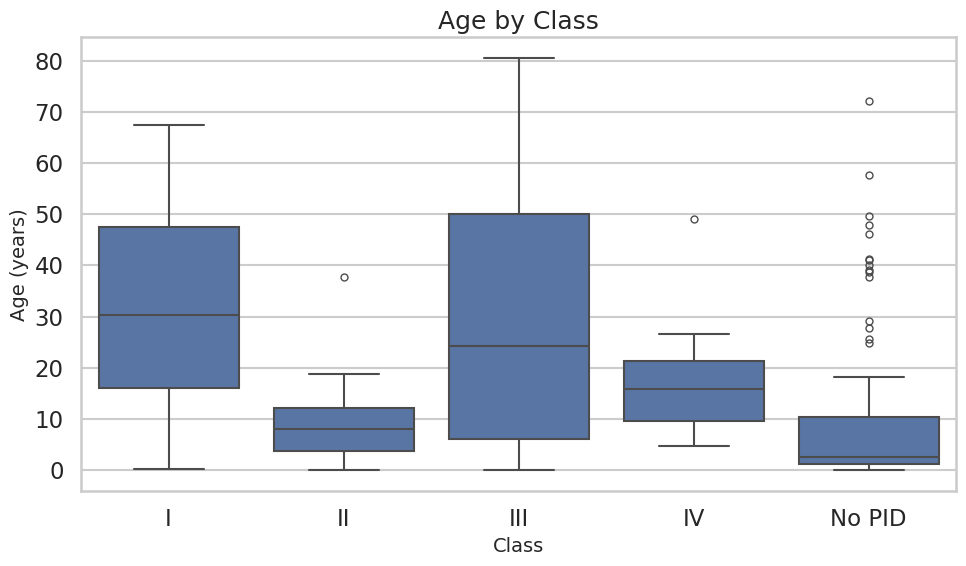

In [70]:
# Desired order based on short class labels
sorted_short_labels = ["I", "II", "III", "IV", "No PID"]

# Reverse-mapping: short label → full label
short_to_full = {v: k for k, v in class_labels.items()}

# Use this full class order for plotting
class_order = [short_to_full[label] for label in sorted_short_labels]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="IUIS", y="Age (Y)", order=class_order, linewidth=1.5, fliersize=5,)
plt.title("Age by Class", fontsize=18)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Age (years)", fontsize=14)

# Apply short labels to x-axis ticks
plt.xticks(ticks=range(len(class_order)), labels=sorted_short_labels, rotation=0)

plt.tight_layout()
plt.savefig("age_by_class.png", dpi=300)
plt.show()

/tmp/ipython-input-3315523743.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


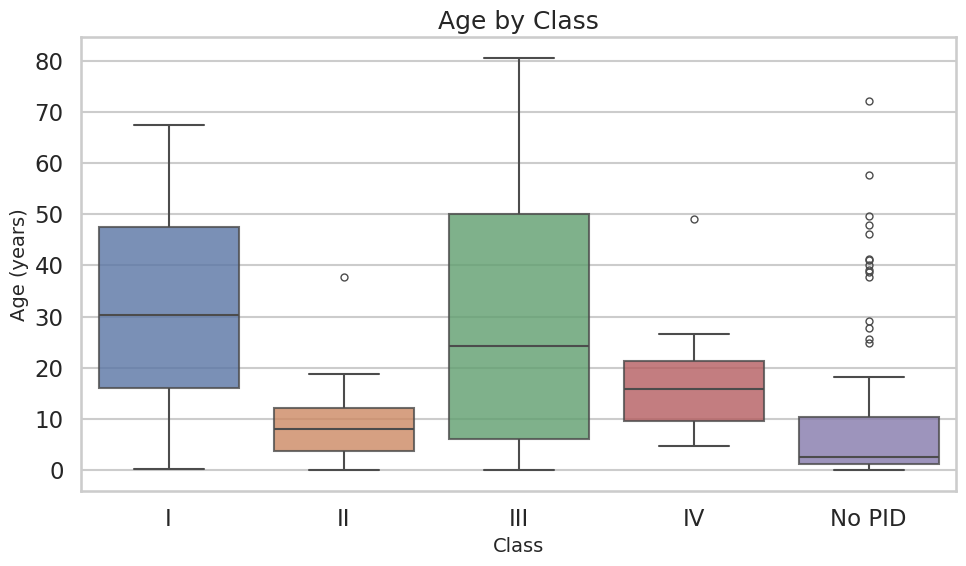

In [71]:
# Desired class order (short labels)
sorted_short_labels = ["I", "II", "III", "IV", "No PID"]
short_to_full = {v: k for k, v in class_labels.items()}
class_order = [short_to_full[label] for label in sorted_short_labels]

# Set seaborn style
sns.set(style="whitegrid", context="talk")

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="IUIS",
    y="Age (Y)",
    order=class_order,
    palette='deep',
    linewidth=1.5,   # thicker lines (including median)
    fliersize=5,     # size of outliers
    boxprops=dict(alpha=0.8),  # transparency for boxes
)

# Title and axis labels
plt.title("Age by Class", fontsize=18)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Age (years)", fontsize=14)

# Set x-axis tick labels to short form
plt.xticks(
    ticks=range(len(class_order)),
    labels=sorted_short_labels,
    rotation=0
)


plt.tight_layout()
plt.savefig("age_by_class_color.png", dpi=300)
plt.show()

# Dimensionality reduction